In [58]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import keras
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import matplotlib.pyplot as plt
from tensorflow.keras import initializers

## Import data 

In [59]:
df_delta = pd.read_excel(r'/Users/dilianaserafimova/Desktop/df_delta_clean.xlsx')

In [60]:
df_delta = df_delta.set_index(['date'])

In [61]:
X = df_delta[['revenue', 'seat_miles', 'load_factor', 'flights']]

In [62]:
y = df_delta['pax_count'].values

## Train & test split

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

## Normalize the data

In [80]:
scaler = MinMaxScaler()

In [81]:
X_train = scaler.fit_transform(X_train)

In [82]:
X_test = scaler.transform(X_test)

## Creating the model 

In [140]:
model = Sequential()

model.add(Dense(4, activation='relu', 
                #kernel_initializer=initializers.RandomNormal(stddev=0.01),
               # bias_initializer=initializers.Zeros()
               ))
model.add(Dense(8, activation='relu'))
#model.add(Dense(6, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(3, activation='relu'))
#model.add(Dense(2, activation='relu'))
model.add(Dense(units=1,activation='relu'))

In [141]:
opt = keras.optimizers.Adam(learning_rate=0.2, beta_1=0.5, beta_2=0.999)

model.compile(loss = 'mean_absolute_error', optimizer= opt)

## Fit the model 

In [142]:
model.fit(X_train, y_train, epochs = 50, validation_data=(X_test, y_test))

Epoch 1/50
6/6 [==============================] - 1s 46ms/step - loss: 6618195.0000 - val_loss: 6856957.5000
Epoch 2/50
6/6 [==============================] - 0s 14ms/step - loss: 6614277.5000 - val_loss: 6827659.0000
Epoch 3/50
6/6 [==============================] - 0s 21ms/step - loss: 6524009.0000 - val_loss: 6454113.0000
Epoch 4/50
6/6 [==============================] - 0s 12ms/step - loss: 5744079.5000 - val_loss: 4174213.0000
Epoch 5/50
6/6 [==============================] - 0s 14ms/step - loss: 2198615.2500 - val_loss: 371222.6250
Epoch 6/50
6/6 [==============================] - 0s 12ms/step - loss: 469630.6875 - val_loss: 492703.3750
Epoch 7/50
6/6 [==============================] - 0s 14ms/step - loss: 488857.4688 - val_loss: 446342.9688
Epoch 8/50
6/6 [==============================] - 0s 17ms/step - loss: 471491.7188 - val_loss: 383285.3750
Epoch 9/50
6/6 [==============================] - 0s 10ms/step - loss: 445340.1562 - val_loss: 554013.6875
Epoch 10/50
6/6 [===========

In [143]:
losses = pd.DataFrame(model.history.history)

In [144]:
losses.head()

,loss,val_loss
0,6618195.00,6856957.500
1,6614277.50,6827659.000
2,6524009.00,6454113.000
3,5744079.50,4174213.000
4,2198615.25,371222.625


<AxesSubplot:>

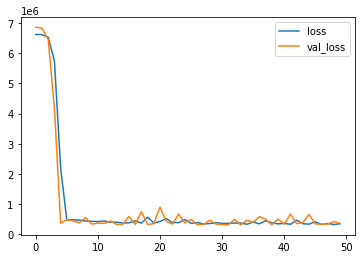

In [145]:
losses.plot()

In [146]:
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

2/2 [==============================] - 0s 3ms/step


In [147]:
model.summary()
for layer in model.layers:
    print("Layer: ", layer.name) # print layer name
    print("  --Kernels (Weights): ", layer.get_weights()) # weights
    print("  --Biases: ", layer.get_weights()) # biases
    

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_65 (Dense)            (None, 4)                 20        
                                                                 
 dense_66 (Dense)            (None, 8)                 40        
                                                                 
 dense_67 (Dense)            (None, 5)                 45        
                                                                 
 dense_68 (Dense)            (None, 3)                 18        
                                                                 
 dense_69 (Dense)            (None, 1)                 4         
                                                                 
Total params: 127
Trainable params: 127
Non-trainable params: 0
_________________________________________________________________
Layer:  dense_65
  --Kernels (Weights):  [array([[-0.62

In [148]:
testScore = math.sqrt(mean_squared_error(y_test, testPredict))
print("Test Score: %.2f RMSE" % (testScore))

Test Score: 536064.14 RMSE


In [149]:
trainScore = math.sqrt(mean_squared_error(y_train, trainPredict))
print("Train Score: %.2f RMSE" % (testScore))

Train Score: 536064.14 RMSE


In [150]:
def plot_delta(actual, predictions):
    title = 'Passanger Predictions Store '
    act = plt.plot(actual, color='blue', label='Actual')
    pred = plt.plot(predictions, color='orange', label='Predictions')
    plt.xlabel("Date")
    plt.ylabel("Paxe")
    plt.legend(loc='best')
    plt.title(title)
    plt.show()

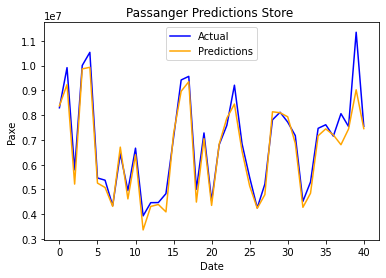

In [151]:
plot_delta(y_test, testPredict)